In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('bank.csv')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [3]:
res_df=df.copy()
le= LabelEncoder()

In [4]:
res_df['job']=le.fit_transform(res_df['job'])
res_df['marital']=le.fit_transform(res_df['marital'])
res_df['education']=le.fit_transform(res_df['education'])
res_df['default']=le.fit_transform(res_df['default'])
res_df['housing']=le.fit_transform(res_df['housing'])
res_df['loan']=le.fit_transform(res_df['loan'])
res_df['contact']=le.fit_transform(res_df['contact'])
res_df['month']=le.fit_transform(res_df['month'])
res_df['poutcome']=le.fit_transform(res_df['poutcome'])
res_df['deposit']=le.fit_transform(res_df['deposit'])
res_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1


In [5]:
X = res_df.drop(['deposit'],axis=1)
Y=res_df['deposit']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeClassifier(random_state=42)
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [7]:
dt=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [11]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [9]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.7630989699955217
[[915 251]
 [278 789]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



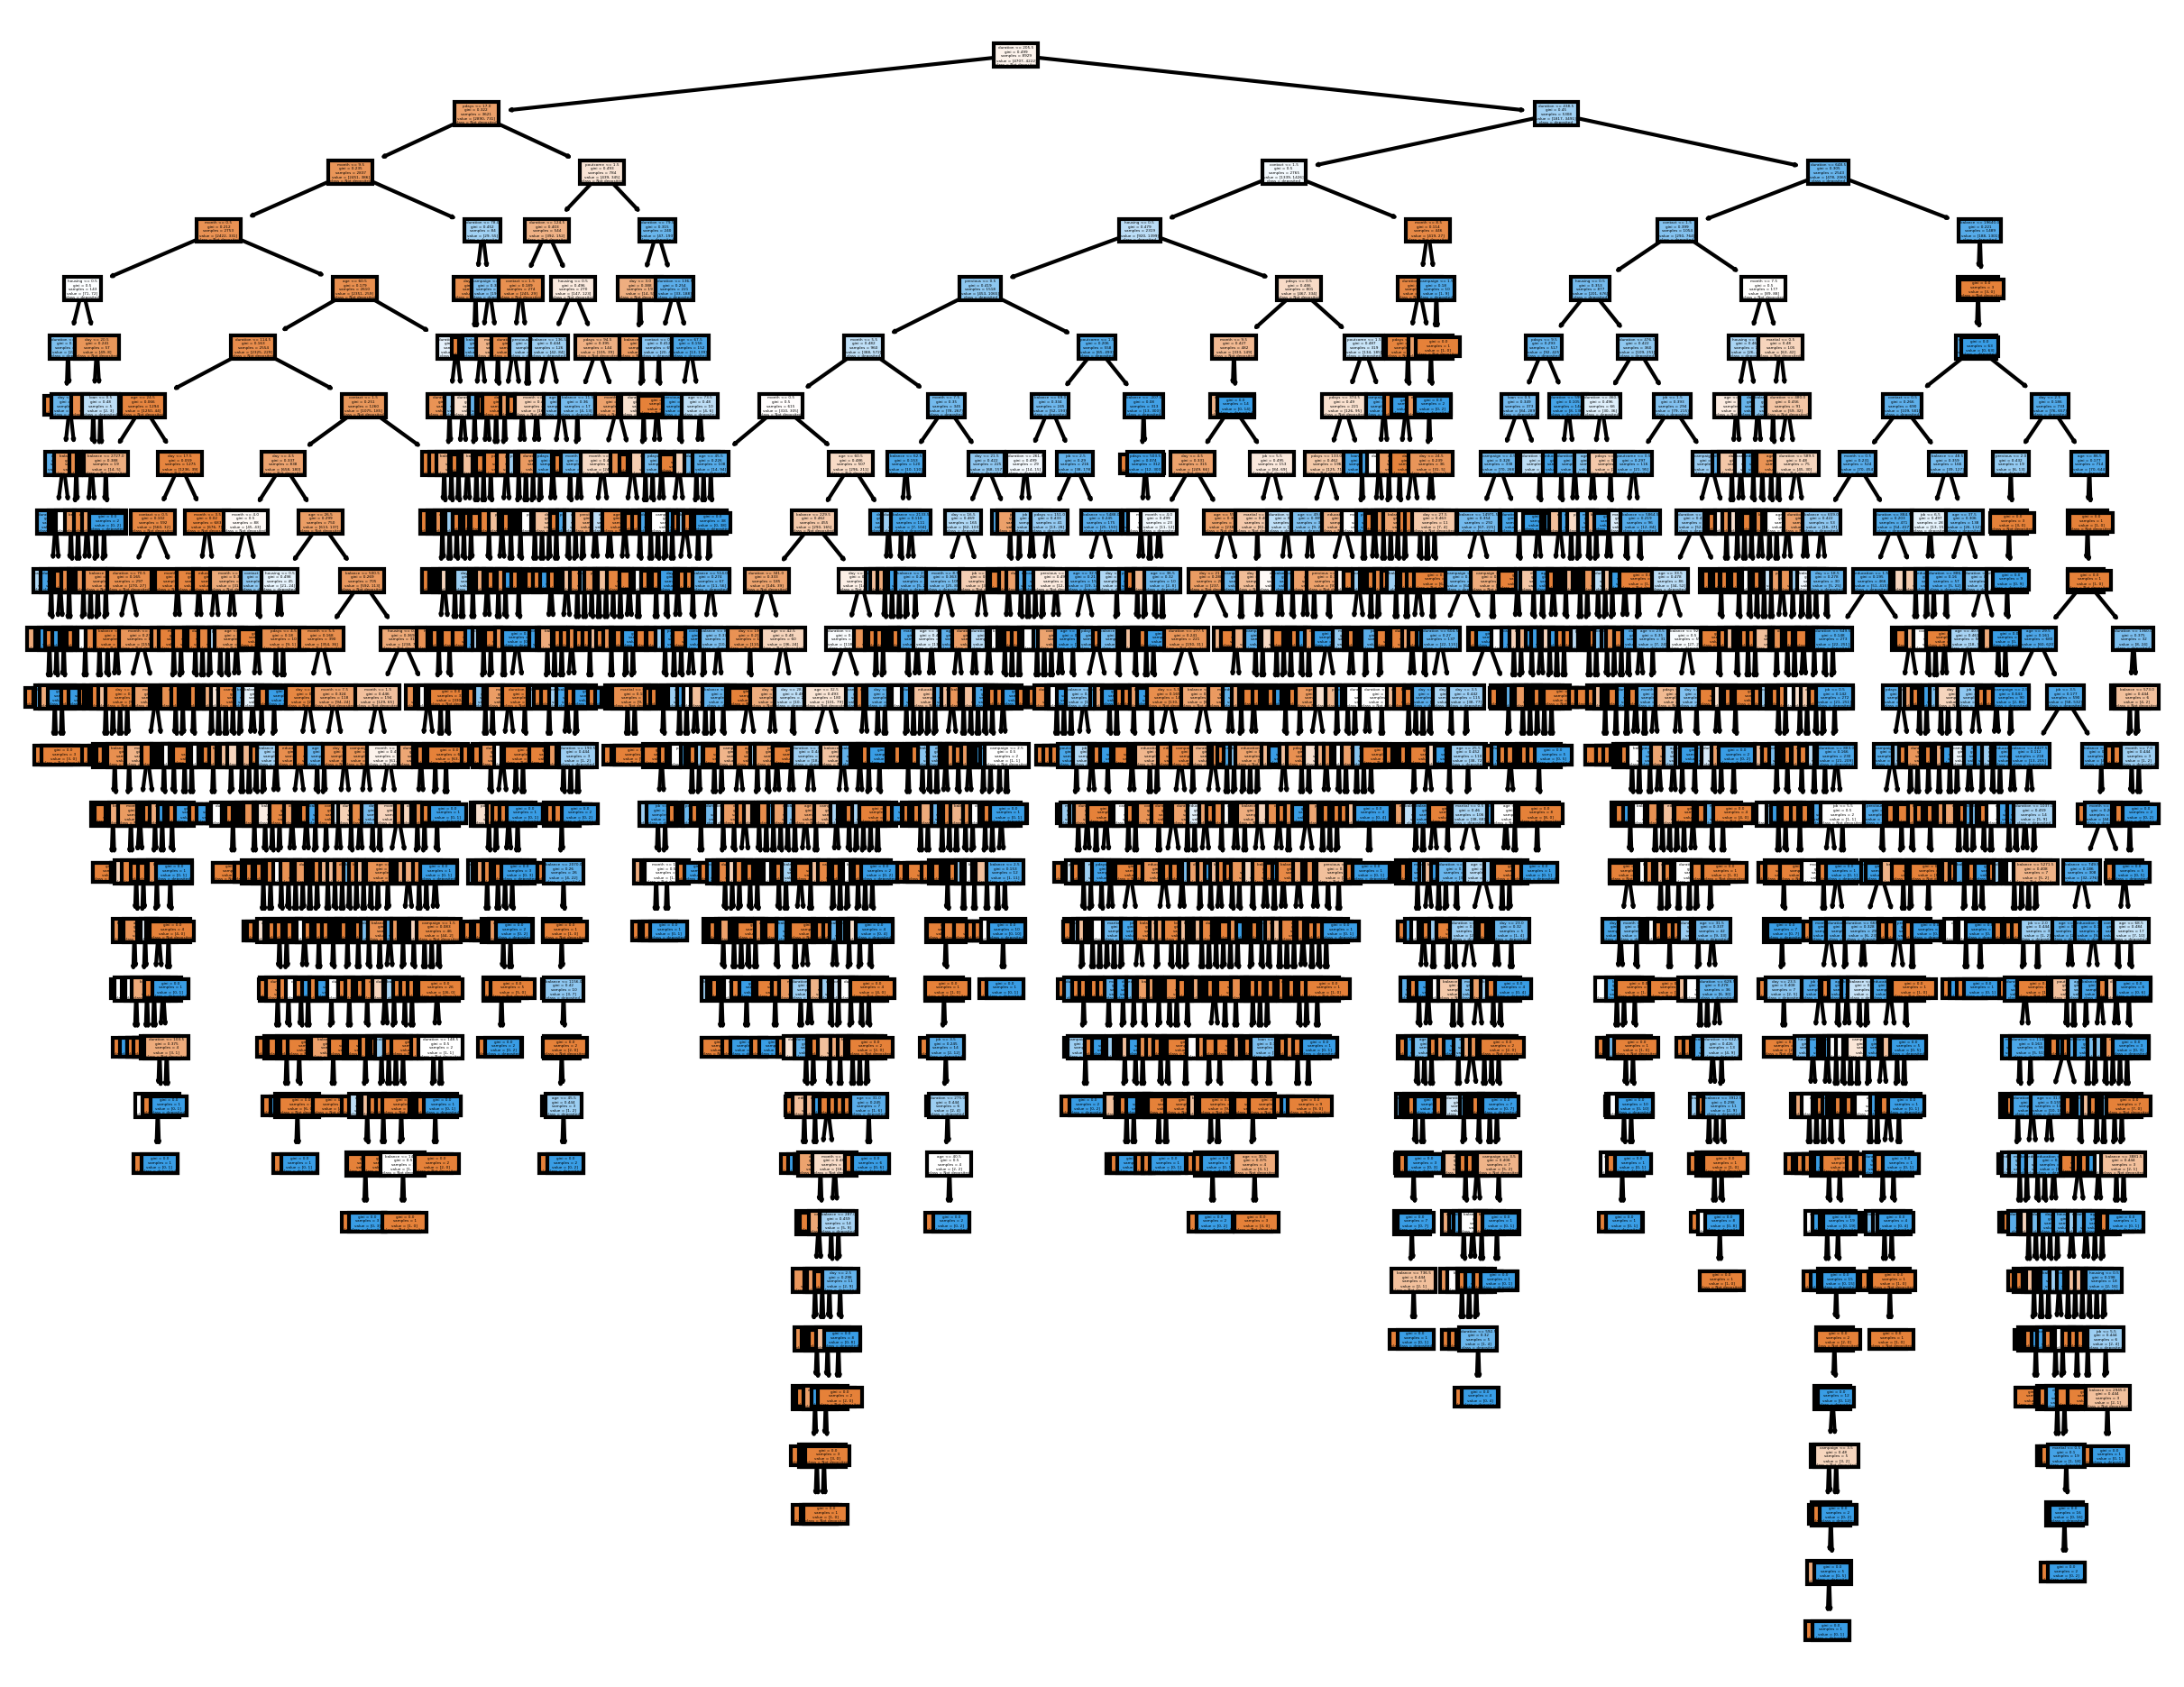

In [10]:
from sklearn import tree
df1=pd.DataFrame(res_df.drop(['deposit'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Not deposited','deposited']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')